In [15]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from matplotlib import animation 
import time, sys  
from IPython.display import HTML

In [2]:
%matplotlib inline 

In [3]:
nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 9.0 / (nx-1)
nt = 1000    #nt is the number of timesteps we want to calculate
dt = .05  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1
T = dt*nt

In [4]:
u = np.zeros(nx)   
u[int(4 / dx):int(5 / dx + 1)] = 1  #setting u = 1 between 0.5 and 0 as per our I.C.s
print(u)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


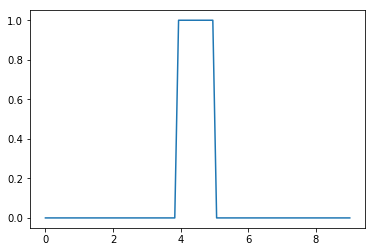

In [5]:
plt.plot(np.linspace(0, 9, nx), u);

In [6]:
sigma = np.zeros(nx)
sigma[:int(1/dx)] = 20
sigma[int(8/dx):] = 20

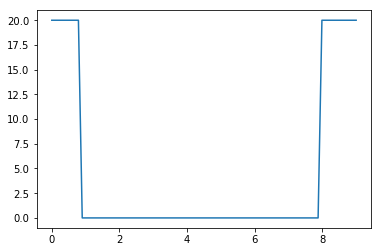

In [7]:
plt.plot(np.linspace(0, 9, nx), sigma);

In [8]:
un = np.zeros(nx)
ux = np.zeros(nx)
v = np.zeros(nx)
vn = np.zeros(nx)
vx = np.zeros(nx)
uu = np.zeros((nt,nx))
uu[0,:] = u.copy()

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    vx[1:nx-1] = v[2:]-v[:nx-2]
    vx[0] = 0
    vx[nx-1] = 0
    ux[1:nx-1] = u[2:]-u[:nx-2]
    ux[0] = u[1] - 0
    ux[nx-1] = 0 - u[nx-2]
    u[1:nx-1] = (u[2:]+u[:nx-2])/2
    u[0] = (u[1] + 0)/2
    u[nx-1] = (0 + u[nx-2])/2
    un = u + c*dt/dx * vx - dt * sigma * u
    v[1:nx-1] = (v[2:]+v[:nx-2])/2
    vn = v + c*dt/dx * ux - dt * sigma * v
    
    u = un.copy()
    v = vn.copy()
    uu[n,:] = u.copy()

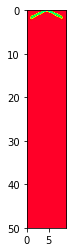

In [9]:
plt.imshow(uu, extent=(0, 9, T, 0),
           interpolation='nearest', cmap=cm.gist_rainbow)
plt.show()

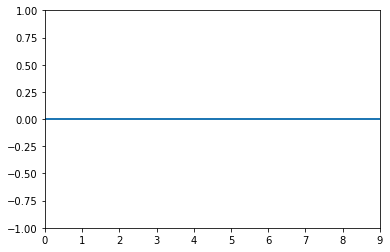

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 9), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(np.linspace(0, 9, nx), uu[i,:])
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#plt.show()
HTML(anim.to_html5_video())